# Validation

In [1]:
%matplotlib inline

In [2]:
import psst

In [3]:
from psst.case import read_matpower
from psst.network import create_network

### Validation of case 1

In [4]:
case = read_matpower('./cases/case3.m')

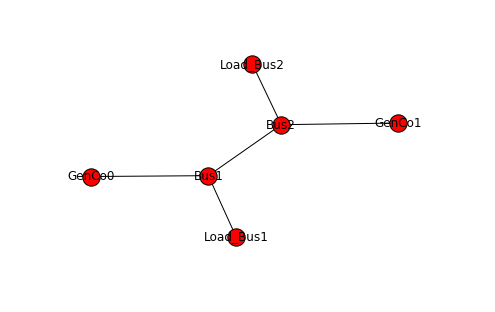

In [27]:
network = create_network(case, prog='neato')
network.draw()

In [8]:
case

<psst.case.PSSTCase(name=case5, Generators=2, Buses=2, Branches=1)>

In [30]:
case.bus

TYPE   PD      QD  GS  BS  AREA  VM  VA  BASEKV  ZONE  VMAX  VMIN
Bus1     3    0  131.47   0   0     1   1   0     230     1   1.1   0.9
Bus2     2  100    0.00   0   0     1   1   0     230     1   1.1   0.9

In [29]:
case.branch

F_BUS T_BUS     BR_R    BR_X     BR_B  RATE_A  RATE_B  RATE_C  TAP  SHIFT  \
0  Bus1  Bus2  0.00281  0.0281  0.00712     800     800     800    0      0   

   BR_STATUS  ANGMIN  ANGMAX  
0          1    -360     360

In [9]:
case.gen

GEN_BUS   PG  QG  QMAX  QMIN  VG  MBASE  GEN_STATUS  PMAX  PMIN  PC1  \
GenCo0    Bus1  200   0    30   -30   1    100           1   200     0    0   
GenCo1    Bus2  500   0    30   -30   1    100           1   500     0    0   

        PC2  QC1MIN  QC1MAX  QC2MIN  QC2MAX  RAMP_AGC  RAMP_10  RAMP_30  \
GenCo0    0       0       0       0       0         0        0        0   
GenCo1    0       0       0       0       0         0        0        0   

        RAMP_Q  APF  
GenCo0       0    0  
GenCo1       0    0

In [10]:
case.gencost

MODEL  STARTUP  SHUTDOWN  NCOST  COST_1  COST_0
GenCo0      1        0         0      2      10       0
GenCo1      1        0         0      2      14       0

In [11]:
case.load

Bus1   Bus2
0   0.0  100.0

In [12]:
from psst.model import build_model

In [13]:
model = build_model(case)

In [14]:
model

<psst.model.PSSTModel(status=None)>

In [15]:
model.solve(solver='cbc', verbose=True)

Welcome to the CBC MILP Solver 
Version: 2.9.6 
Build Date: May 27 2016 

command line - /usr/local/bin/cbc -mipgap 0.01 -printingOptions all -import /var/folders/wk/lcf0vgd90bx0vq1873tn04knk_djr3/T/tmpYCIRIR.pyomo.lp -import -stat=1 -solve -solu /var/folders/wk/lcf0vgd90bx0vq1873tn04knk_djr3/T/tmpYCIRIR.pyomo.soln (default strategy 1)
No match for mipgap - ? for list of commands
No match for 0.01 - ? for list of commands
Option for printingOptions changed from normal to all
Current default (if $ as parameter) for import is /var/folders/wk/lcf0vgd90bx0vq1873tn04knk_djr3/T/tmpYCIRIR.pyomo.lp
Presolve 7 (-41) rows, 13 (-27) columns and 22 (-77) elements
Statistics for presolved model
Original problem has 2 integers (2 of which binary)


Problem has 7 rows, 13 columns (8 with objective) and 22 elements
There are 8 singletons with objective 
Column breakdown:
10 of type 0.0->inf, 2 of type 0.0->up, 0 of type lo->inf, 
1 of type lo->up, 0 of type free, 0 of type fixed, 
0 of type -inf->0.0,

### Input data

In [16]:
import pandas as pd

In [17]:
pd.DataFrame(case.gen['PMAX'])

PMAX
GenCo0   200
GenCo1   500

In [18]:
case.load

Bus1   Bus2
0   0.0  100.0

### Model Results

In [19]:
model.results.unit_commitment

GenCo0  GenCo1
0       1       1

In [20]:
model.results.power_generated

GenCo0  GenCo1
0     100       0

In [21]:
model.results.production_cost

1000

In [22]:
model.results.line_power

0
0  100

In [23]:
model.results.lmp

Bus1  Bus2
0    10    10

In [24]:
from psst.plot import line_power

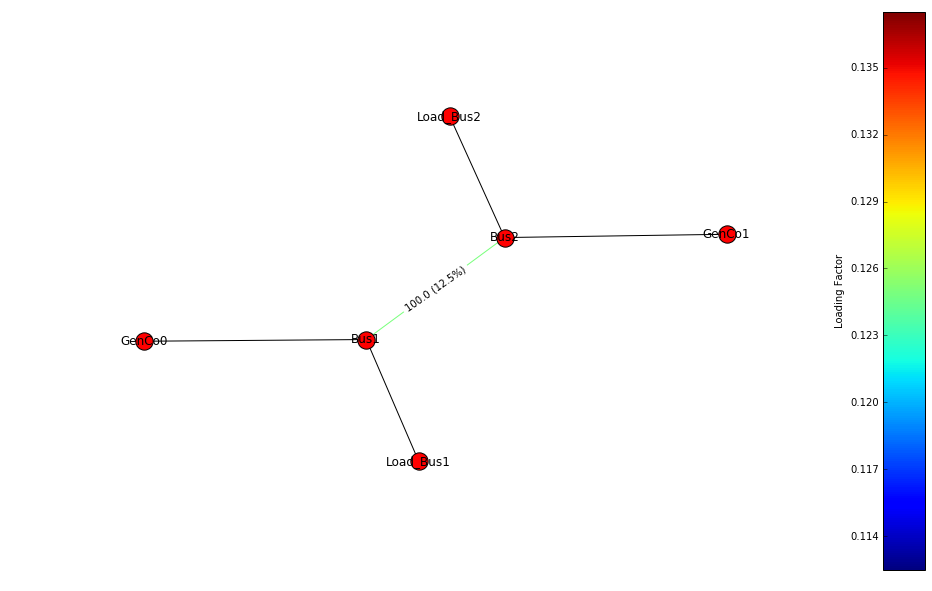

In [28]:
line_power(network, model.results, hour=0)